#A) Los siguientes datos fueron extraidos de un [perfil real de Instragram](https://www.instagram.com/paulacano24/):

https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/Followers.json

Interprete los datos como un problema de caida libre y a partir del ajuste (fit) a la correspondiente ecuación de movimiento, determine
1. La velocidad inicial de incremento de seguidores en `followers/hour`
1. La aceleración constante en `followers/hour**2`
1. El número máximo de seguidores que alcanzaría el perfil
1. La fecha en la que se alcanzaría dicho máximo



In [239]:
import pandas as pd
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt


In [240]:
dfo = pd.read_json("https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/Followers.json")
dfo

,followers,date_time,hours
0,42696,2021-08-04 22:06:53.668,0.000000
1,42706,2021-08-04 23:06:56.517,1.000791
2,42716,2021-08-05 00:06:59.505,2.001621
3,42734,2021-08-05 01:07:02.174,3.002363
4,42749,2021-08-05 02:07:04.854,4.003107
...,...,...,...
615,47452,2021-09-02 12:29:21.834,686.374491
616,47486,2021-09-02 19:59:32.801,693.877537
617,47491,2021-09-02 20:59:50.542,694.882465
618,47493,2021-09-02 21:59:59.345,695.884910


In [241]:
polyfit = np.polyfit(dfo["hours"],dfo["followers"],deg = 2) # Coeficientes del
#Polinomio de interpolacion
poly = np.poly1d(polyfit) # Polinomio de interpolacion para los valores

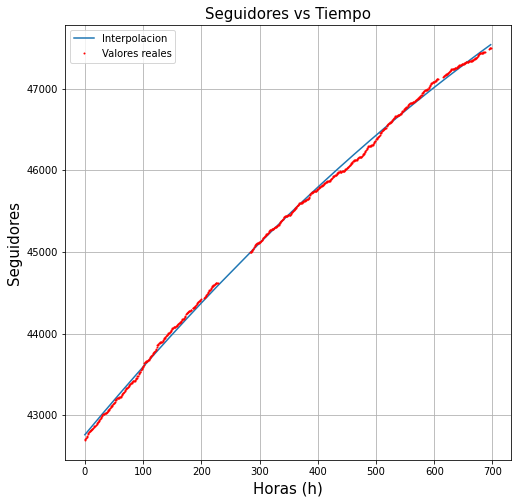

In [242]:
plt.figure(figsize= (8,8))
plt.plot(dfo["hours"],poly(dfo["hours"]),label="Interpolacion")
plt.plot(dfo["hours"],dfo["followers"],"ro", markersize=1,label="Valores reales")
plt.xlabel("Horas (h)",fontsize = 15)
plt.ylabel("Seguidores", fontsize =15)
plt.title("Seguidores vs Tiempo", fontsize = 15)
plt.grid()
plt.legend()

### Como la ecuacion de un movimiento parabolico es
\begin{equation}
F(t) = F_0+v_0*t+\frac{1}{2}at^2 \\
\end{equation}
La velocidad inicial es
\begin{equation}
v_0 = 8.552 h
\end{equation}
Y la aceleracion es 
\begin{equation}
\frac{a}{2} = -0.002438\quad a = -4.876*10^{-3}h^2
\end{equation}

In [243]:
times = dfo["date_time"].values.astype(float) # Convertir datos tipo date_time a float
# Los coeficientes del polinomio de interpolacion
poldate = np.polyfit(times,dfo["followers"], deg = 2) 
polydate = np.poly1d(poldate) # El polinomio
# Se saca la derivada y se buscan las raices para hallar el valor maximo
deriv = np.poly1d(polydate.deriv())
maximo = deriv.roots
print("El valor maximo es {}".format(polydate(maximo)[0]))
# Se pasa la fecha en formato float a tipo date_time
fecha = pd.to_datetime(maximo[0])
print(fecha)

El valor maximo es 50262.136728167534
2021-10-17 00:18:28.965938432


### El valor maximo que alcanzaria seria $50262,1367$

### El momento en el que alcanza el maximo de seguidores

###$2021-10-17 \quad 00:18:28.9659$

###B) El período de  un pendulo de longitud $l$ oscilando a ángulos grandes  $\alpha$, está dado por
$$
T=T_{0} \frac{\sqrt{2}}{\pi} \int_{0}^{\alpha} \frac{d \theta}{(\cos \theta-\cos \alpha)^{\frac{1}{2}}}
$$
donde
$$
T_{0}=2 \pi \sqrt{\frac{l}{g}}
$$
es el período del mismo péndulo a pequeñas amplitudes. Culquier intento de evaluación numérico de esa integral debería fallar. Sin embargo, si hacemos el cambio de variable
$$
\sin \frac{\theta}{2}=\sin \frac{\alpha}{2} \sin \phi
$$
obtenemos
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$
que corresponde a una integral bien comportada. 
1. Escriba un programa que use la anterio integral para calcular el cociente  $T/T_0$ para ángulos enteros (en grados) $0^\circ \le\alpha \le 90^\circ$.  
1. Genere un DataFrame de pandas que contenga como columnas: la amplitud en grados, la amplitud en radianes, y el cociente $T/T_0$, 
1. Haga un gráfico de $T/T_0$ como función de $\alpha$ (en grados). 
1. Explain the result when $\alpha = 0.$ 

In [244]:
def f(phi, alpha): # Funcion a integrar
  return 1/np.sqrt(1-(np.sin(alpha/2)*np.sin(phi))**2)
# Array con los angulos de alpha
angles = np.linspace(0,90,91).astype(int)
# Array con los valores de la integral para cierto alpha entre 0° y 90°
integral = np.array([quad(f,0,np.pi/2,args=(np.deg2rad(a)))[0] for a in angles])
# Valor del periodo /T0
T_T0 = (2/np.pi)*integral
data = {"alpha":angles,"alpha(rad)":np.deg2rad(angles),"T/T0":T_T0}
df = pd.DataFrame.from_dict(data)


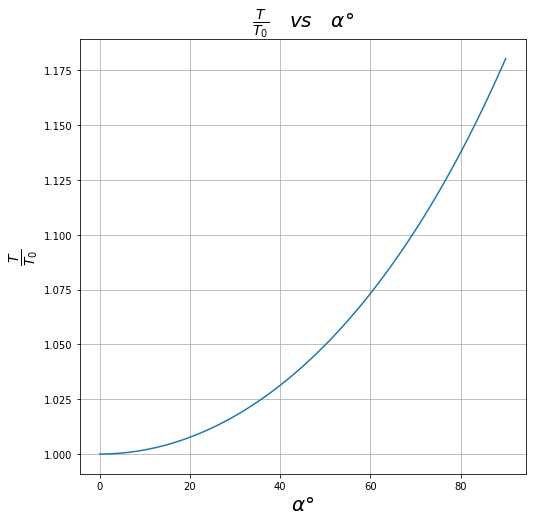

In [245]:
plt.figure(figsize = (8,8))
plt.plot(df["alpha"],df["T/T0"])
plt.ylabel(r"$\frac{T}{T_0}$",fontsize = 20)
plt.xlabel(r"$\alpha°$",fontsize = 20)
plt.title(r"$\frac{T}{T_0} \quad vs \quad \alpha°$", fontsize = 20)
plt.grid()

### Cuando $\alpha=0$
\begin{equation}
T = \frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}} = \frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}}  d\phi = \frac{2T_0}{\pi}*\frac{\pi}{2}=T_0
\end{equation}
### Asi cuando hallamos el cociente $\frac{T}{T_0}$ cuando $\alpha =0$
\begin{equation}
\frac{T}{T_0} = \frac{T_0}{T_0}=1
\end{equation}